In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def sigmoide(z):
    return 1 / (1+np.exp(-z))

def sigmoide_derivada_respecto_z(z):
    return sigmoide(z)*(1-sigmoide(z)) 

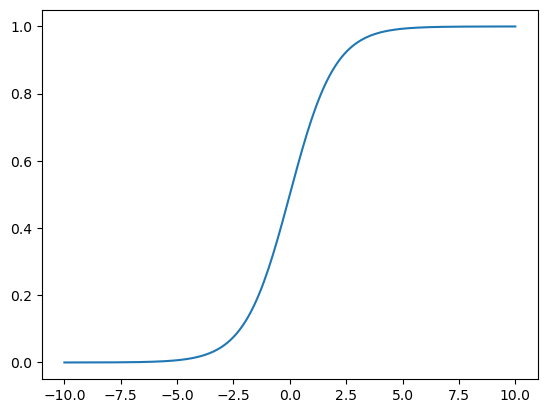

In [3]:
xs = np.linspace(-10, 10, 200)
ys = sigmoide(xs)
plt.plot(xs, ys)

In [4]:
# dataset or
#dt = [[0,0,0], [0,1,1], [1,0,1], [1,1,1]]
# dataset and
dt = [[0, 0, 0],[0, 1, 0],[1, 0, 0],[1, 1, 1]]
# dataset xor
#dt = [[0,0,0], [0,1,1], [1,0,1], [1,1,0]]

dt = np.array(dt)
print(dt)
x = dt[:,[0,1]]
y = dt[:,[2]]
print(x)
print(y)

global w1,w2,b
w1 = 2
w2 = 3
b = 4


[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [0]
 [0]
 [1]]


In [5]:
w1=2; w2=3; b=4
#w = [[w1], [w2]]

In [6]:
a = np.array([
     [1 ,2],
     [3, 4],
     [5, 6]
    ])
b = np.array([[1],[1],[1]])
a = np.append(a,b,1)
a

array([[1, 2, 1],
       [3, 4, 1],
       [5, 6, 1]])

In [7]:
def salida_sumatorio_v1(x):
  x1 = x[:, [0]]
  x2 = x[:, [1]]
  t1 = x1 * w1
  t2 = x2 * w2
  ret = t1 + t2 + b
  return ret

def salida_sumatorio(x):
  array_unos = np.ones((len(x),1))
  x_nueva = np.append(x,array_unos,1)
  # x_nueva = np.hstack((x, array_unos))

  ret = np.dot(x_nueva,w) # x @ w
  return ret

def salida_activacion(x):
  s = salida_sumatorio(x)
  s2 = sigmoide(s)
  return s2

def error(x, y):
  y_hat = salida_activacion(x)
  err = y_hat - y
  return err

def coste(x, y):
  err = error(x, y)
  c = err**2
  c = c /2
  c = c.mean()
  return c

def derivada_coste_respecto_y_hat(x, y):
  z = error(x, y)
  return z

def derivada_y_hat_respecto_salida_sumatorio(x):
  z = salida_sumatorio(x)
  d = sigmoide_derivada_respecto_z(z)
  return d

def derivada_sumatorio_respecto_w1(x):
  return x[:, [0]]

def derivada_sumatorio_respecto_w2(x):
  return x[:, [1]]

def derivada_sumatorio_respecto_bias():
  return 1

def derivada_sumatorio_respecto_w(x):
  array_unos = np.ones((len(x),1))
  x_nueva = np.append(x,array_unos,1)
  return x_nueva

def predice(x):
  y_hat = salida_activacion(x)
  return y_hat

In [8]:
def fit(x,y,epochs=100,lr=0.01):
    lloss = []
    # global w1,w2,b
    global w
    for epoch in range(epochs):
        dc = derivada_coste_respecto_y_hat(x, y)
        dy = derivada_y_hat_respecto_salida_sumatorio(x)
        # dw1 = derivada_sumatorio_respecto_w1(x)
        # dw2 = derivada_sumatorio_respecto_w2(x)
        # db = derivada_sumatorio_respecto_bias()
        dw = derivada_sumatorio_respecto_w(x)


        # w1 = w1 - (lr*dc*dw1).mean()
        # w2 = w2 - (lr*dc*dw2).mean()
        # b = b - (lr*dc*dy*db).mean()

        d1 = dy * dc
        d2 = d1 * dw
        #Alternativamente: dmedia = d2.mean(axis=0); dmedia = np.reshape(d)
        dt = d2.T
        dmedia = dt.mean(axis=1,keepdims=True)
        w = w - lr*dmedia

        loss = coste(x,y)
        # print(f"loss: {loss} w1: {w1} w2: {w2} b: {b}")
        # print(f"loss: {loss} w1: {w}")
        lloss.append(loss)
    return lloss

In [9]:
s = salida_activacion(x)
print(s)
er = error(x,y)
print(er)
c = coste(x,y)
print(c)
dc = derivada_coste_respecto_y_hat(x,y)
print(dc)

NameError: name 'w' is not defined

loss: 0.003949244921191334 w1: 2 w2: 3 b: [[1]
 [1]
 [1]]
loss: 0.003949244921191334 w: [[ 4.2856932 ]
 [ 4.2856932 ]
 [-6.52872009]]
[[0.00145874]
 [0.09595265]
 [0.09595265]
 [0.88520449]]


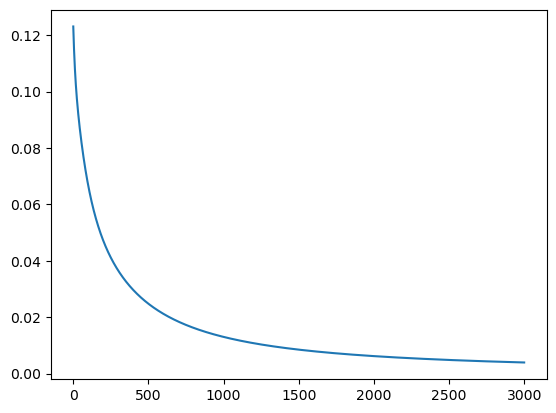

In [13]:
# w1 = 0;w2 = 0;b = 0
w = np.array([[0],[0],[0]])

nepochs = 3000

lloss = fit(x, y, epochs = nepochs, lr=0.5)
print(f"loss: {lloss[-1]} w1: {w1} w2: {w2} b: {b}")
print(f"loss: {lloss[-1]} w: {w}")
ret = predice(x)
print(ret)
plt.plot([i for i in range(len(lloss))], lloss)